 # Impelementacion de Principal Analisis Componet sobre un set de datos aleatorio  

## Importacion de Librerias

In [12]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Implementacion 

#### Creación del set de datos

In [13]:
#Creacion de un set de datos dummy

df = np.random.randint(10,50,100).reshape(20,5)

df_mean = df - np.mean(df, axis=0)

#El axis =0 hace referencia a que queremos calcular la media a lo largo de las colunas del data frame


#### Ahora procedemos a calculamos la matriz de covarianza


In [14]:
M = np.cov(df_mean, rowvar = False)

""" 
rowvar indica como están organizados nuestros datos, para este caso lo asignamos 
a false indicando que las variables estan organizadas en columnas y cada fila es una 
toma de las variables
"""
#valores y vectores propios

eigenvalues, eigenvectors = np.linalg.eigh(M)

#Ahora buscamos el valor propio más grande 

e_values= np.argsort(eigenvalues)

index = e_values[::-1] #Esta notacion en el indice esta indicando que queremos escoger los valores de atras hacia adelante

#hacemos un masking con los indices encontrados para ordenar los arrays de los vectores
sorted_values = eigenvalues[index] 
sorted_eigenvectors = eigenvectors[:,index] #esto indica que vamos ha hacer el masking a lo largo de las columnas





In [15]:
#Selecionamos la cantidad de componentes que vamos a usar por simplicidad escogimos dos

n = 2 
N = sorted_eigenvectors[:,0:n]

#Re escribimos la data en la nueva base
df_reduced = np.dot(N.transpose(),df_mean.transpose()).transpose()

#### Graficamos

<AxesSubplot:>

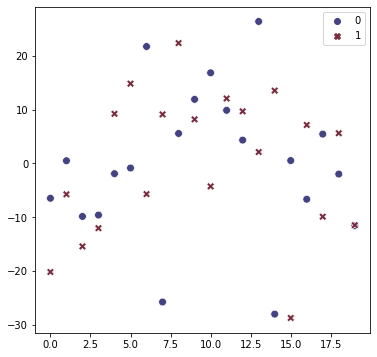

In [19]:

plt.figure(figsize = (6,6))
sb.scatterplot(data = df_reduced  , s = 60 , palette= 'icefire')
